In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
light_bg = False
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
if light_bg:
    transparent = False
else:
    matplotlib.style.use("dark_background")
    transparent = True

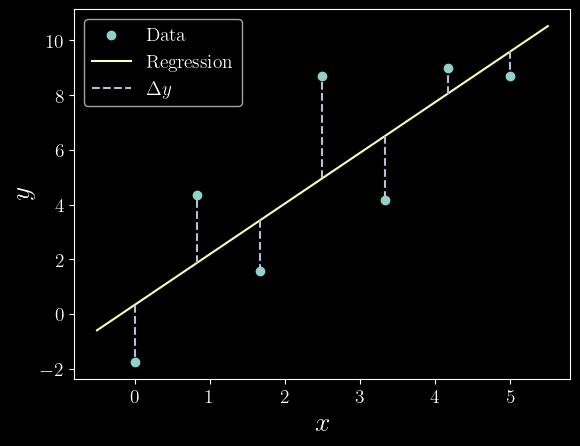

In [3]:
rng = np.random.default_rng(140)

# generate data points
xpoints = np.linspace(0, 5, num=7)
ypoints = 2 * xpoints + rng.normal(loc=0.0, scale=1.5, size=len(xpoints))

fig = plt.figure()
ax = plt.gca()
ax.scatter(xpoints, ypoints, label="Data")

# perform linear regression
result = linregress(xpoints, ypoints)

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = result.slope * xplot + result.intercept
ax.plot(xplot, yplot, color="C1", label="Regression")

# plot distances to minimize
for i, (xv, yv) in enumerate(zip(xpoints, ypoints)):
    y0 = xv * result.slope + result.intercept
    if i == 0:
        ax.plot((xv, xv), (y0, yv), linestyle="--", color="C2", label="$\Delta y$")
    else:
        ax.plot((xv, xv), (y0, yv), linestyle="--", color="C2")
    
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("linregress.pdf", bbox_inches="tight", transparent=transparent)

# Simple Regression

Material based on Chapter 15 of Numerical Recipes.

We start by writing down the $\chi^2$ expression for a linear model:
$$
\chi^2(x_i, y_i, \sigma_i; a, b) = \sum_i \frac{(y_i - a - bx_i)^2}{\sigma_i^2}
$$
To find our two parameters, we take the (partial) derivative with respect to that parameter, and set it equal to 0:
$$
\begin{aligned}
0 = \frac{\partial \chi^2}{\partial a} &= -2 \sum_i \frac{y_i - a - bx_i}{\sigma_i^2} \\[1em]
0 = \frac{\partial \chi^2}{\partial b} &= -2 \sum_i \frac{x_i(y_i - a - bx_i)}{\sigma_i^2}
\end{aligned}
$$
Let's start with our expression from maximizing with respect to $a$. We can break the sum up into three different terms:
$$
\sum_i \frac{y_i - a - bx_i}{\sigma_i^2} = \sum_i \frac{y_i}{\sigma_i^2} - a \sum_i \frac{1}{\sigma_i^2} - b\sum_i\frac{x_i}{\sigma_i^2} = 0.
$$
We can do a similar thing for the other expression:
$$
\sum_i \frac{x_i(y_i - a - bx_i)}{\sigma_i^2} = \sum_i \frac{x_i y_i}{\sigma_i^2} - a\sum_i \frac{x_i}{\sigma_i^2} - b \sum_i \frac{x_i^2}{\sigma_i^2} = 0.
$$
Now we can introduce some notation that will make our lives easier:
$$
\begin{gathered}
S \equiv \sum_i \frac{1}{\sigma_i^2} \qquad S_x \equiv \sum_i \frac{x_i}{\sigma_i^2} \qquad S_y \equiv \sum_i \frac{y_i}{\sigma_i^2} \\[0.5em]
S_{xx} \equiv \sum_i \frac{x_i^2}{\sigma_i^2} \qquad S_{xy} \equiv \sum_i \frac{x_i y_i}{\sigma_i^2} 
\end{gathered}
$$
So now, our system of equations looks a little bit simpler:
$$
\begin{gathered}
a S + b S_x = S_y \\
a S_x + b S_{xx} = S_{xy}
\end{gathered}
$$
Now we want to solve our system of equations. Substitution is as good a method as any:
$$
\begin{aligned}
a &= \frac{S_y - b S_x}{S}; \\[0.5em]
\Rightarrow S_{xy} &= \left( \frac{S_y - b S_x}{S} \right) S_x + b S_{xx} \\[0.5em]
S S_{xy} &= S_x S_y - b (S_x)^2 + b S S_{xx} \\[0.5em]
b \underbrace{(S S_{xx} - (S_x)^2)}_{\Delta} &= S S_{xy} - S_x S_y \\[0.5em]
b &= \frac{S S_{xy} - S_x S_y}{\Delta}.
\end{aligned}
$$
Now, substituting back into my other expression (to get what $a$ should be), we have:
$$
\begin{aligned}
a &= \frac{S_y - b S_x}{S} \\[0.5em]
a &= \frac{S_y - (S S_{xy} - S_x S_y) S_x / \Delta}{S}\\[0.5em]
&= \frac{\Delta S_y - S S_x S_{xy} + S_x^2 S_y}{S \Delta} \\[0.5em]
&= \frac{(S S_{xx} - S_x^2)S_y - S S_x S_{xy} + S_x^2 S_y}{S \Delta} \\[0.5em]
&= \frac{S S_{xx} S_y - S_x^2 S_y - S S_x S_{xy} + S_x^2 S_y}{S \Delta} \\[0.5em]
\Rightarrow a &= \frac{S_{xx} S_y - S_x S_{xy}}{\Delta}.
\end{aligned}
$$
So this gives us the results we have from Monday:
$$
\begin{aligned}
\Delta &\equiv S S_{xx} - (S_x)^2 \\[0.5em]
a &= \frac{S_{xx} S_y - S_x  S_{xy}}{\Delta} \\[0.5em]
b &= \frac{S S_{xy} - S_x S_y}{\Delta}.
\end{aligned}
$$

## Uncertainty
If we want to now compute the uncertainty on our parameters $a$ and $b$, we start with the formula for propagation of errors for a general function $f$:
$$
\sigma_f^2 = \sum_i \sigma_i^2 \left( \frac{\partial f}{\partial y_i} \right)^2.
$$
For our case, we have:
$$
\begin{aligned}
\frac{\partial a}{\partial y_i} &= \frac{S_{xx} - S_x x_i}{\sigma_i^2 \Delta} \\[0.5em]
\frac{\partial b}{\partial y_i} &= \frac{S x_i - S_x}{\sigma_i^2 \Delta}.
\end{aligned}
$$
Summing over all of the points, we get:
$$
\begin{aligned}
\sigma_a^2 &= S_{xx} / \Delta \\[0.5em]
\sigma_b^2 &= S / \Delta.
\end{aligned}
$$
Related to these quantities, we want to also compute the _covariance_ between $a$ and $b$. When this quantity is positive, it says that our errors in $a$ and $b$ are likely to be correlated with each other, and when it's negative, they are anti-correlated. The covariance can be normalized to form the _cross-correlation coefficient_ $r$, which is bound to be between -1 and 1. The expression for the covariance is:
$$
\mathrm{Cov}(a, b) = -S_x / \Delta.
$$
The cross-correlation coefficient $r$ is:
$$
r_{ab} = \frac{-S_x}{\sqrt{S S_{xx}}}.
$$
Finally, we want to estimate how "good" of a fit we have. We write this goodness-of-fit parameter as $Q$, and compute it using the (upper) incomplete gamma function $Q(a, x)$:
$$
Q(a, x) = \frac{1}{\Gamma(a)} \int_x^\infty t^{a-1}e^{-t} \mathrm{d}t.
$$
This is implemented in SciPy as `scipy.special.gammaincc(a, x)`. Using this function, we can compute the goodness-of-fit parameter $Q$ as:
$$
Q = \mathtt{gammaincc}\left(\frac{N-2}{2}, \frac{\chi^2}{2} \right),
$$
where $N$ is the number of points we have and $\chi^2$ is our chi-squared value for the fit (given our best-guess at $a$ and $b$). $Q$ is bound to be between 0  and 1. Values of $Q \geq 0.1$ are in the "great fit" category. Values of $10^{-3} \leq Q \leq 0.1$ are in the "suspect, but debatable" category. Anything less than that is the "bad fit" category. As we'll see below, we have a value that is $\sim 10^{-8}$, which means it is a particularly poor fit. This is due to having uncertainties that are too small to reasonably fit all of the data. Other explanations for low values of $Q$ are that satisfactory values could not be found, or that the model itself is not a good fit for the data.


## Uniform variance

For this case, we're going to assume that the variance of the data points $y_i$ is the same (i.e., that $\sigma_i = \sigma \forall i$). This gives me a much simpler expression for solving for $a$ and $b$:
$$
\begin{aligned}
\Delta &= N \sum_i x_i^2 - \left( \sum_i x_i\right)^2 \\[0.5em]
a &= \frac{\sum_i x_i^2 \sum_i y_i - \sum_i x_i \sum_i x_i y_i}{\Delta} \\[0.5em]
b &=\frac{N \sum_i x_i y_i - \sum_i x_i \sum_i y_i}{\Delta},
\end{aligned}
$$
where $N$ is the total number of data points.

In [4]:
# coding the implementation
from scipy.special import gammaincc

def compute_lin_regress(xvals, yvals, svals=None):
    """
    Compute a linear regression given data and optionally uncertainties.
    
    This function assumes a linear functional form of a model, where
        y(x) = a + b * x.
    The goal is to find the values of `a` and `b` that best fit the data,
    their associated uncertainties, the covariance between thenm, and optionally
    the goodness-of-fit parameter Q.
    
    Parameters
    ----------
    xvals : 1d numpy array
        A one-dimensional array of input values corresponding to the independent variables.
    yvals : 1d numpy array
        A one-dimensional array of input values corresopnding to the dependent variables.
        These should match `xvals` pair-wise.
    svals : 1d numpy array, optional
        The associated 1-sigma uncertainties for `yvals`. If not provided, the fit is still
        performed, but some quantities are adjusted, and the goodness-of-fit parameter Q is
        not computed.
        
    Returns
    -------
    results : dict
        A dictionary containing the results. The keys are: "a" (constant term), "b" (slope),
        "chi2" (the chi-square value of the fit), "sigma_a" (the 1-sigma uncertainty on a),
        "sigma_b" (the 1-sigma uncertainty on b), "cov" (the covariance between uncertainties
        of a and b), "r" (the cross-correlation coefficient), and optionally "Q"
        (goodness-of-fit parameter). Note that "Q" is only included if `svals` is provided.
    """
    n = len(xvals)
    if n <= 2:
        raise ValueError("Need at least 3 points to compute regression")
    if len(yvals) != n:
        raise ValueError("x and y must have the same length")

    if svals is None:
        svals = np.ones_like(xvals)
        have_s = False
    else:
        if len(svals) != n:
            raise ValueError("sigma must have the same length as x and y")
        have_s = True
    s = np.sum(1.0 / svals**2)
    sx = np.sum(xvals / svals**2)
    sy = np.sum(yvals / svals**2)
    sxx = np.sum(xvals**2 / svals**2)
    sxy = np.sum(xvals * yvals / svals**2)
    
    delta = s * sxx - sx**2

    # compute our values of a and b; save in a dict
    results = {}
    a = (sxx * sy - sx * sxy) / delta
    b = (s * sxy - sx * sy) / delta
    results["a"] = a
    results["b"] = b
    
    # compute chi-square
    chi2 = np.sum(((yvals - a - b * xvals) / svals)**2)
    results["chi2"] = chi2

    # compute uncertainty on a and b
    sigma_a = np.sqrt(sxx / delta)
    sigma_b = np.sqrt(s / delta)
    # correct in case we don't have external uncertainty
    if not have_s:
        sigma_a *= np.sqrt(chi2 / (n - 2))
        sigma_b *= np.sqrt(chi2 / (n - 2))
    results["sigma_a"] = sigma_a
    results["sigma_b"] = sigma_b
    
    # compute covariance + cross-correlation coefficient
    cov = - sx / delta
    results["cov"] = cov
    r = -sx / np.sqrt(s * sxx)
    results["r"] = r
    
    # maybe compute goodness-of-fit
    if have_s:
        q = gammaincc((n - 2) / 2, chi2 / 2)
        results["q"] = q

    return results

In [5]:
my_results = compute_lin_regress(xpoints, ypoints)
print("a: ", my_results["a"])
print("b: ", my_results["b"])

a:  0.32522878786104165
b:  1.8547381309338637


In [6]:
# compare with the "official" results from scipy
print("a (scipy): ", result.intercept)
print("b (scipy): ", result.slope)

print("a, relative error: ", (my_results["a"] - result.intercept) / result.intercept)
print("a, relative error: ", (my_results["b"] - result.slope) / result.slope)

a (scipy):  0.32522878786104137
b (scipy):  1.8547381309338635
a, relative error:  8.534169376017193e-16
a, relative error:  1.1971749608298154e-16


# Incorporating Uncertainty

Let's now assume that we know some of our points better than others. Adding uncertainty is relatively straightforward. First, let's visualize:

In [7]:
svals = rng.uniform(0.5, 2, size=len(xpoints))

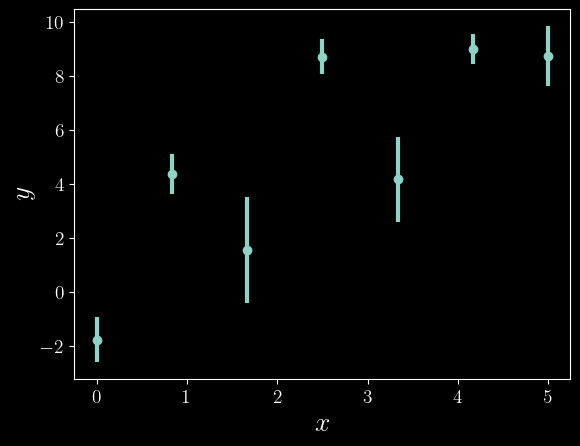

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.errorbar(xpoints, ypoints, yerr=svals, linestyle="", marker="o", linewidth=3)

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("uncertainty.pdf", bbox_inches="tight", transparent=transparent)

Now, let's compute. We did the hard work before, so we can just drop in our uncertainty values and have it naturally propagate.

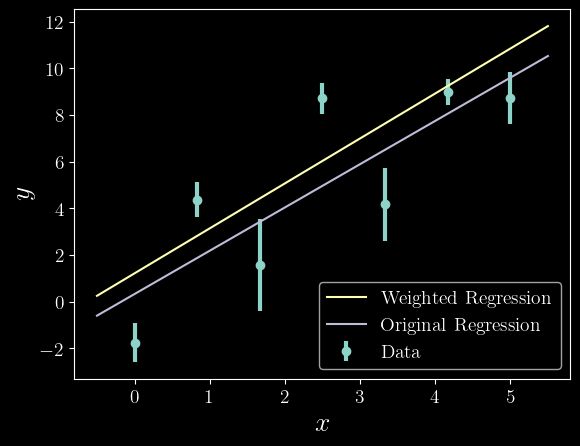

In [9]:
my_results2 = compute_lin_regress(xpoints, ypoints, svals)

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xpoints, ypoints, yerr=svals, linestyle="", marker="o", linewidth=3, label="Data")

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = my_results2["b"] * xplot + my_results2["a"]
ax.plot(xplot, yplot, color="C1", label="Weighted Regression")

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = my_results["b"] * xplot + my_results["a"]
ax.plot(xplot, yplot, color="C2", label="Original Regression")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("uncertainty_regress.pdf", bbox_inches="tight", transparent=transparent)

# More comparison with SciPy

In [10]:
print("uncertainty:")
print("scipy: ", result.stderr)
print("ours: ", my_results["sigma_b"])
print("relative difference: ", (my_results["sigma_b"] - result.stderr) / result.stderr)

print("\nintercept uncertainty:")
print("scipy: ", result.intercept_stderr)
print("ours: ", my_results["sigma_a"])
print("relative difference: ", (my_results["sigma_a"] - result.intercept_stderr) / result.intercept_stderr)

uncertainty:
scipy:  0.6017827786388316
ours:  0.6017827786388315
relative difference:  -1.8448899902658607e-16

intercept uncertainty:
scipy:  1.8081322208945856
ours:  1.8081322208945854
relative difference:  -1.2280330075373208e-16


In [11]:
print("goodness-of-fit:")
print(my_results2["q"])

goodness-of-fit:
1.4684469279510467e-08


# Larger Errors

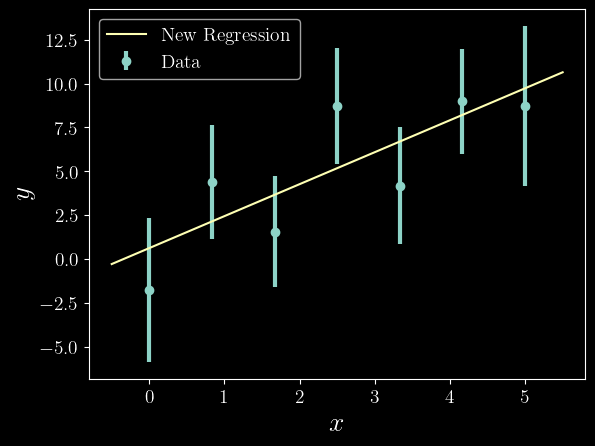

In [12]:
svals2 = rng.uniform(3, 5, size=len(xpoints))

my_results3 = compute_lin_regress(xpoints, ypoints, svals2)

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xpoints, ypoints, yerr=svals2, linestyle="", marker="o", linewidth=3, label="Data")

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = my_results3["b"] * xplot + my_results3["a"]
ax.plot(xplot, yplot, color="C1", label="New Regression")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("uncertainty_regress2.pdf", bbox_inches="tight", transparent=True)

In [13]:
print("new goodness-of-fit:")
print(my_results3["q"])

new goodness-of-fit:
0.6871076205798555


# Non-linear Least Squares

In [14]:
tvals = rng.uniform(0, 2 * np.pi, size=(100,))
noise = rng.normal(loc=0.0, scale=0.5, size=(100,))
amp = 3.2
omega = 1.2
phi = 0.5
posvals = amp * np.cos(omega * tvals + phi) + noise

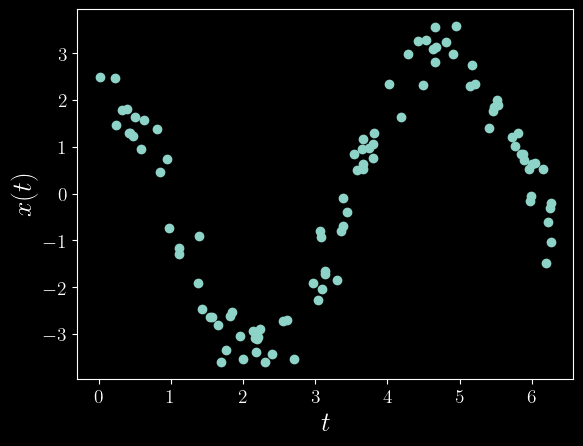

In [15]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(tvals, posvals)
ax.set_xlabel("$t$", fontsize=20)
ax.set_ylabel("$x(t)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("sho.pdf", bbox_inches="tight", transparent=True)

$$
x(t) = A \cos\left(\omega t + \phi \right)
$$

In [16]:
# perform non-linear least squares fitting
from scipy.optimize import curve_fit

def f(x, am, om, ph):
    return am * np.cos(om * x + ph)

popt, pcov = curve_fit(f, tvals, posvals)
print(popt)

[3.19149457 1.21103937 0.49639062]


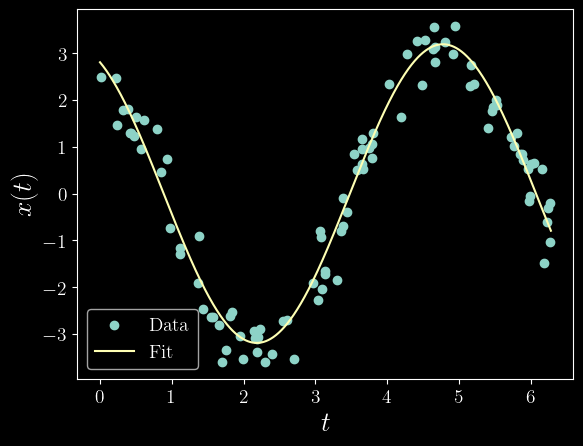

In [17]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(tvals, posvals, label="Data")

xinterp = np.linspace(0, 2 * np.pi, num=1000)
ax.plot(xinterp, f(xinterp, *popt), color="C1", label="Fit")

ax.set_xlabel("$t$", fontsize=20)
ax.set_ylabel("$x(t)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("sho_fit.pdf", bbox_inches="tight", transparent=True)